# Chromatin potential analysis

Before running the chromatin potential analysis, run `scarlink`. Chromatin potential estimation does not not require cell-type-specific tile significance so the `-c` parameter is optional. Here we calculate chromatin potential on developing human cortex (Trevino et al., 2021). The `scarlink` output is saved in the directory `human_cortex`.

```
scarlink -o human_cortex -g hg38
```

In [1]:
import scarlink.src.chromatin_potential as scp

In [2]:
dirname = "human_cortex/"

# 1. Create gene expression object

Create dictionary with anndata objects of predicted and observed gene expression. Both predicted and observed gene expression are smoothed over K-nearest neighbors from the LSI matrix. A force-directed layout is computed for visualizations.

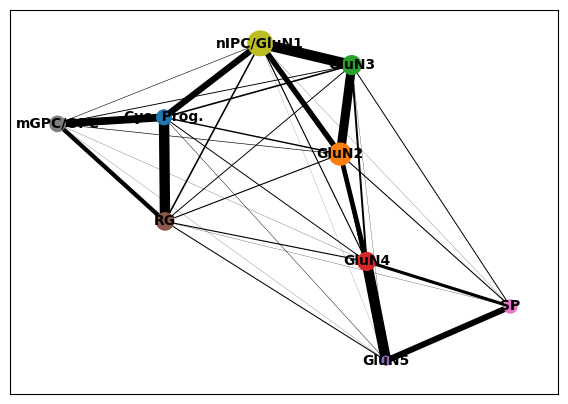

In [3]:
chrom_p = scp.create_object(dirname)

# 2. Cluster genes (optional)

Subsetting/clustering genes using `cluster_genes` is optional. It might be helpful in some systems with more complex gene programs. `cluster_genes` applies hierarchical clustering on observed gene experession and plots the heatmap of the identified gene clusters. In this case, we estimated two gene clusters using `n_clust=2`. The two gene clusters have distinct expression profiles across the cell types.

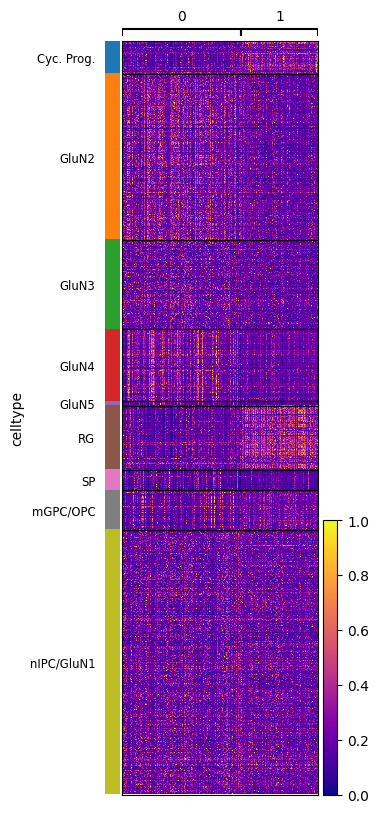

In [4]:
genes = scp.cluster_genes(chrom_p, n_clust=2)

# 3. Plot chromatin potential arrows

The function `plot_arrows` computes the arrows based on the difference between predicted and observed gene expression. It can be run on all the genes that SCARlink was trained on, or a subset of genes identified either by clustering (using `cluster_genes`) or known gene subsets.

Here we first plot the arrows without any gene subsetting.

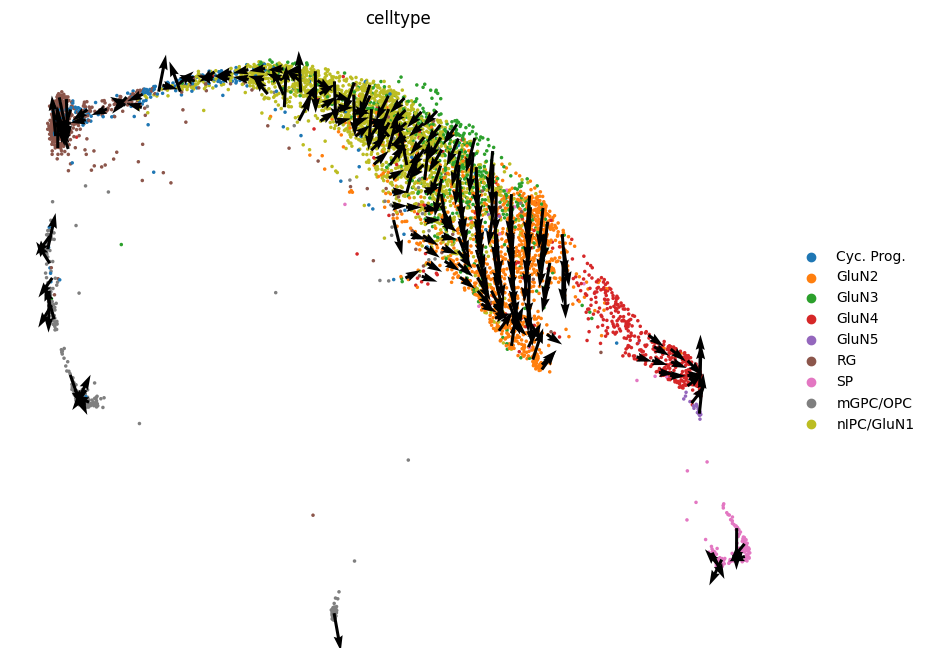

In [5]:
scp.plot_arrows(chrom_p)

Now plot chromatin potential arrows for genes in cluster 0.

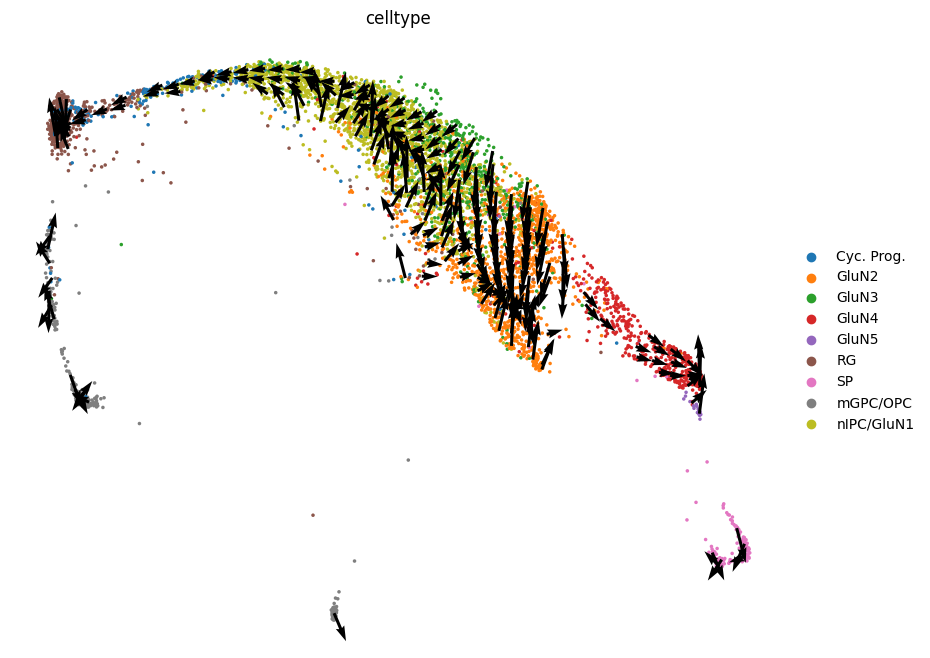

In [6]:
scp.plot_arrows(chrom_p, genes=genes['0'])

Plot chromatin potential arrows for genes in cluster 1. These genes capture the known differentiation trajectory.

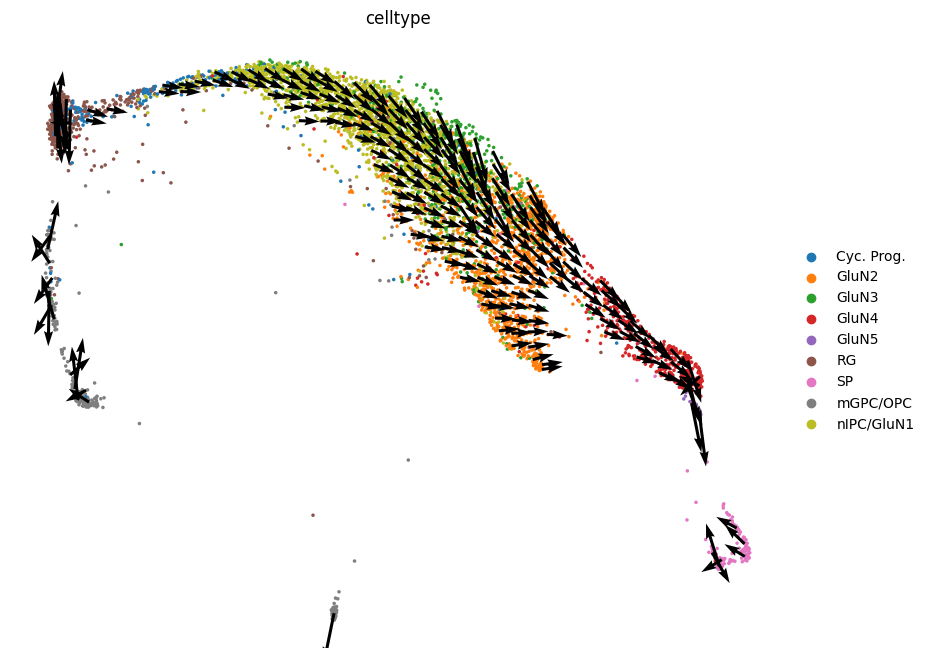

In [7]:
scp.plot_arrows(chrom_p, genes=genes['1'])